In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
STEEL_PATH = r"C:\Users\David\OneDrive\Desktop\4th year subjects\Machine Learning\steel.csv"
df = pd.read_csv(STEEL_PATH)

In [7]:
print(df.head())
print(df.info())

   normalising_temperature  tempering_temperature  percent_silicon  \
0                  178.500                    275           0.1530   
1                  178.500                    950           0.1530   
2                  178.500                    375           0.1530   
3                  178.500                    900           0.1530   
4                  189.525                    900           0.1624   

   percent_chromium  percent_copper  percent_nickel  percent_sulphur  \
0          0.970575           0.942          0.8870              0.0   
1          1.212726           0.942          0.8870              0.0   
2          1.621165           0.942          0.8870              0.0   
3          0.809989           0.942          0.8870              0.0   
4          1.036229           0.849          0.9382              0.0   

   percent_carbon  percent_manganese  tensile_strength  
0           1.920                0.0         25.107613  
1           1.920               

In [8]:
TARGET_COL = "tensile_strength"

In [9]:
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [11]:
mlp_pipe = Pipeline([("scaler", StandardScaler()),("mlp", MLPRegressor(max_iter=2000,random_state=42,activation="relu",learning_rate_init=0.001))])

In [12]:
param_grid = {"mlp__hidden_layer_sizes": [(50,),(100,),(50, 50)],"mlp__alpha": [0.0001, 0.001, 0.01]}

In [13]:
grid_search = GridSearchCV(estimator=mlp_pipe,param_grid=param_grid,scoring="neg_mean_squared_error",cv=5,n_jobs=-1,verbose=2)

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPRegressor(max_iter=2000,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__alpha': [0.0001, 0.001, 0.01],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)]},
             scoring='neg_mean_squared_error', verbose=2)

In [15]:
print("Best parameters:", grid_search.best_params_)
print("Best CV score (neg MSE):", grid_search.best_score_)

Best parameters: {'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (50, 50)}
Best CV score (neg MSE): -1263.7896626450495


In [16]:
best_model = grid_search.best_estimator_

In [17]:
y_pred = best_model.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)

In [19]:
mae = mean_absolute_error(y_test, y_pred)

In [20]:
rmse = np.sqrt(mse)

In [21]:
r2 = r2_score(y_test, y_pred)

In [22]:
print("\nTest set performance:")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R^2 : {r2:.4f}")


Test set performance:
MSE : 1041.4187
RMSE: 32.2710
MAE : 25.5732
R^2 : 0.8936


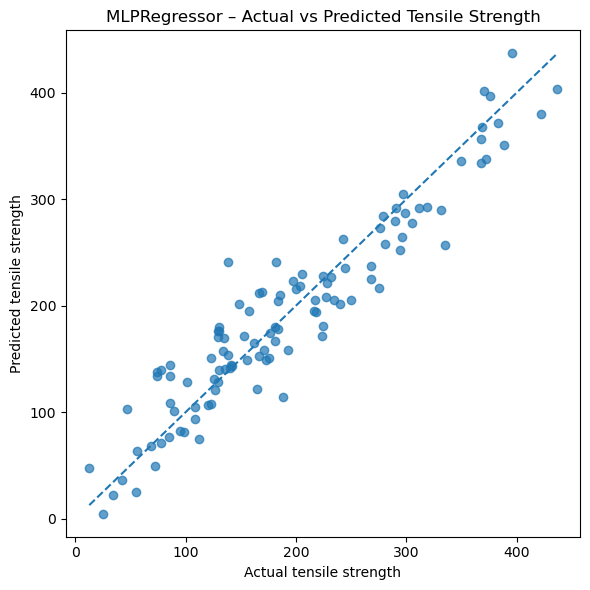

In [23]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],linestyle="--")
plt.xlabel("Actual tensile strength")
plt.ylabel("Predicted tensile strength")
plt.title("MLPRegressor – Actual vs Predicted Tensile Strength")
plt.tight_layout()
plt.show()